<a href="https://colab.research.google.com/github/Jorge-89/Regresiones_TP_UNSAM/blob/main/Red%20Neuronal%20Convolucional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
from sklearn.datasets import load_boston
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_val_score

In [4]:

#se importa el set de datos
url = 'https://raw.githubusercontent.com/Jorge-89/Regresion-Lineal-/main/base_datos_estaciones_met_V3_train.csv'
df = pd.read_csv(url, sep=",")
df.columns

Index(['Unnamed: 0', 'fecha_completa', 'Fecha', 'Hora',
       'Temp_Alicia AgriculturaCba', 'Humedad_Alicia AgriculturaCba',
       'PP_Alicia AgriculturaCba', 'Temp_Las Varas AgriculturaCba',
       'Humedad_Las Varas AgriculturaCba', 'PP_Las Varas AgriculturaCba',
       'Temp_San Miguel - Establecimiento Don Luis',
       'Humedad_San Miguel - Establecimiento Don Luis',
       'PP_San Miguel - Establecimiento Don Luis',
       'Temp_San Miguel - Listello', 'Humedad_San Miguel - Listello',
       'PP_San Miguel - Listello', 'Temp_ San Miguel - Las Varillas',
       'Humedad_ San Miguel - Las Varillas', 'PP_ San Miguel - Las Varillas'],
      dtype='object')

In [28]:
x= df[[ 'Temp_Las Varas AgriculturaCba', 'Humedad_Las Varas AgriculturaCba',
        'Temp_San Miguel - Establecimiento Don Luis', 'Humedad_San Miguel - Establecimiento Don Luis',
       'Temp_San Miguel - Listello', 'Humedad_San Miguel - Listello',
       'Temp_ San Miguel - Las Varillas', 'Humedad_ San Miguel - Las Varillas']]
y= df["Temp_Alicia AgriculturaCba"]

In [29]:
#Separo los datos de "train" en entrenamiento y prueba "test" para probar los algoritmos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [31]:
#Estandarizo las features, las redes son muy sensibles a datos no escalados.
scaler_labels = StandardScaler()
x_train = scaler_labels.fit_transform(x_train)
x_test = scaler_labels.transform(x_test)

In [36]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
print(x_test.shape)


(2074, 8, 1)


In [74]:
model = Sequential()
model.add(Conv1D(32, 2, activation="relu", input_shape=(8, 1)))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Flatten())
model.add(Dense(16, activation="relu"))
model.add(Flatten())
model.add(Dense(16, activation="relu"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")
 
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 7, 32)             96        
_________________________________________________________________
flatten_8 (Flatten)          (None, 224)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                14400     
_________________________________________________________________
flatten_9 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 16)                1040      
_________________________________________________________________
flatten_10 (Flatten)         (None, 16)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 16)               

In [96]:
#Defino la función neuronal
def define_model():
    
    model = Sequential()
    model.add(Conv1D(32, 2, activation="relu", input_shape=(8, 1)))
    model.add(Flatten())
    model.add(Dense(64, activation="relu"))
    model.add(Flatten())
    model.add(Dense(16, activation="relu"))
    model.add(Flatten())
    model.add(Dense(16, activation="relu"))
    model.add(Dense(1))
    model.compile(loss="mse", optimizer="adam")
    
   
    return model

In [97]:
model = define_model()

In [91]:
import numpy
import pandas as pd
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:

#Veamos como se comporta el modelo con CV y con hiperparametros obtenidos de GriSearchCV 
   
    # To start from scratch

#Luego de tener un modelo con regularización es conveniente usar un CV y tener un mse para ver como se comporta con datos que nunca observo.
regressor = KerasRegressor(build_fn = define_model, batch_size = 32, epochs = 100)
errores = cross_val_score(regressor, x_test, y_test, cv = 5, scoring='neg_mean_squared_error', n_jobs=-1)
errores = -errores
errores

array([0.5663274 , 0.66082623, 0.86898977, 0.61239222, 0.78993946])

In [101]:
print(errores.mean(), errores.std())

0.6996950166589896 0.11289309516807737


In [100]:
model.fit(x_train, y_train, batch_size=32,epochs=100)

Epoch 1/100
260/260 [==============================] - 1s 2ms/step - loss: 79.3915
Epoch 2/100
260/260 [==============================] - 0s 2ms/step - loss: 1.0050
Epoch 3/100
260/260 [==============================] - 0s 2ms/step - loss: 0.7408
Epoch 4/100
260/260 [==============================] - 0s 2ms/step - loss: 0.6739
Epoch 5/100
260/260 [==============================] - 0s 2ms/step - loss: 0.6618
Epoch 6/100
260/260 [==============================] - 0s 2ms/step - loss: 0.6515
Epoch 7/100
260/260 [==============================] - 0s 2ms/step - loss: 0.6394
Epoch 8/100
260/260 [==============================] - 0s 2ms/step - loss: 0.6612
Epoch 9/100
260/260 [==============================] - 0s 2ms/step - loss: 0.6472
Epoch 10/100
260/260 [==============================] - 0s 2ms/step - loss: 0.6328
Epoch 11/100
260/260 [==============================] - 0s 2ms/step - loss: 0.6294
Epoch 12/100
260/260 [==============================] - 0s 2ms/step - loss: 0.6543
Epoch 13/100

In [85]:
y_pred_test = model.predict(x_test)
y_pred_test

array([[25.34413 ],
       [27.542027],
       [14.382778],
       ...,
       [34.321987],
       [27.577824],
       [29.098696]], dtype=float32)

In [86]:
print('Precisión del modelo usando la raíz del error cuadratico medio (RMSE):')
score_testeo = mean_squared_error(y_test,y_pred_test,squared= True)

print (score_testeo)

Precisión del modelo usando la raíz del error cuadratico medio (RMSE):
0.47291498677222094


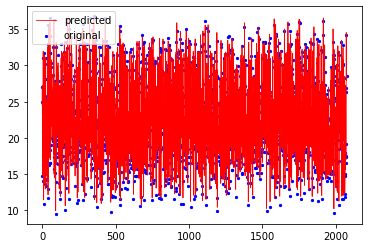

In [73]:
x_ax = range(len(y_pred_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred_test, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()